[[ 5.50821972e-02 -1.21995365e-02 -2.81754376e+01]
 [-5.97791562e-03  5.20669070e-02 -9.42495889e+00]
 [-2.55784250e-05  8.17129989e-06  1.73686501e-01]]


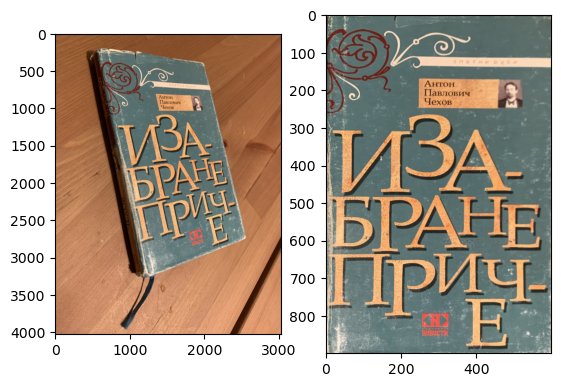

In [3]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import numpy.linalg as la
import cv2
import requests
from io import BytesIO
from PIL import Image

def proj_pres(tacke):
    a=la.det(np.array([tacke[3], tacke[1], tacke[2]]).T)
    b=la.det(np.array([tacke[0], tacke[3], tacke[2]]).T)
    c=la.det(np.array([tacke[0], tacke[1], tacke[3]]).T)
    return np.array([a*tacke[0], b*tacke[1], c*tacke[2]]).T

def naivni_alg(tacke, slike_tacaka):
    P1=proj_pres(tacke)
    P2=proj_pres(slike_tacaka)
    return np.dot(P2, la.inv(P1))

T1=np.array([566, 246, 1])
T2=np.array([1977, 408, 1])
T3=np.array([2542, 2735, 1])
T4=np.array([1228, 3235, 1])
tacke=np.array([T1, T2, T3, T4])

w=600
h=900

slike_tacaka=np.array([[0, 0, 1], [w-1, 0, 1], [w-1, h-1, 1], [0, h-1, 1]])
P=naivni_alg(tacke, slike_tacaka)
print(P)

url1 = "https://raw.githubusercontent.com/Beldzik/PPGR-domaci/refs/heads/main/2_DLT_i_distorzija/Distorzija/Cehov.jpg"
response = requests.get(url1)
img1 = Image.open(BytesIO(response.content))
img1_np = np.array(img1)  

img_new = cv2.warpPerspective(img1_np, P, (w, h))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img_new)
plt.show()